In [4]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import random

In [ ]:

X_train,labels = make_blobs(n_samples=20000,centers=3,random_state = 42)
X_train = StandardScaler().fit_transform(X_train)

<Axes: >

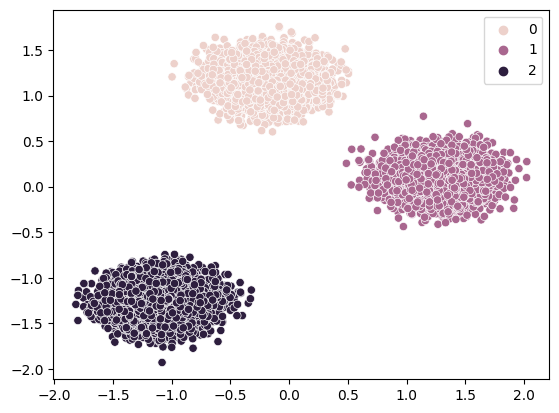

In [ ]:
sns.scatterplot(x=[x[0] for x in X_train],y=[x[1] for x in X_train],hue=labels)

In [ ]:
min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
# self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
print(min_,max_)

[-1.81584672 -1.93052182] [2.02263194 1.75788297]


In [ ]:
minx = 1e9
maxx = -1e9
miny = 1e9
maxy = -1e9
for i in X_train:
  minx = min(minx,i[0])
  maxx = max(maxx,i[0])
  miny = min(miny,i[1])
  maxy = max(maxy,i[1])
print((minx,maxx,miny,maxy))

(-1.8158467201849722, 2.022631937545056, -1.9305218210117632, 1.7578829672828546)


In [ ]:
class KMeans:
  def __init__(self,n_clusters,max_iter,X_train):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.X_train = X_train

  def initialize_centroids(self):
    min_coord = np.min(self.X_train,axis=0)
    max_coord = np.max(self.X_train,axis=0)
    self.centroids = [[min_coord[0]+(random.random())*(max_coord[0]-min_coord[0]),min_coord[1]+(random.random())*(max_coord[1]-min_coord[1])] for _ in range(self.n_clusters)]
  def euclidian_distance(self,point,data):
    return np.sqrt(np.sum((point-data)**2,axis=1))
  def initialize_clusters(self):
    iteration = 0
    prev_coordinates = [[1e9 for _ in range(len(self.centroids[0]))] for _ in range(self.n_clusters)]
    while np.not_equal(self.centroids,prev_coordinates).any() and  iteration<self.max_iter:
      sorted_points = [[] for _ in range(self.n_clusters)]
      for i in self.X_train:
        dist = self.euclidian_distance(i,self.centroids)
        centroid_idx = np.argmin(dist)
        sorted_points[centroid_idx].append(i)
      prev_coordinates = self.centroids
      self.centroids = [np.mean(cluster,axis=0) for cluster in sorted_points]
      for i,centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = prev_coordinates[i]
      iteration+=1
  def fit(self):
    X_train = self.X_train
    self.initialize_centroids()
    self.initialize_clusters()
  def evaluate(self,X_test):
    labels = []
    for i in X_test:
      dist = self.euclidian_distance(i,self.centroids)
      labels.append(np.argmin(dist))
    return labels


In [ ]:
class KMeansplus:
  def __init__(self,n_clusters,max_iter,X_train):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.X_train = X_train
  def euclidian_distance(self,point,data):
    return np.sqrt(np.sum((point-data)**2,axis=1))

  def initialize_centroids(self):
    print("centroids initializing")
    X_train = self.X_train
    self.centroids = [random.choice(X_train)]
    for _ in range(self.n_clusters-1):
      dists = np.sum([self.euclidian_distance(centroid, X_train) for centroid in self.centroids], axis=0)
      dists /= np.sum(dists)
      new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
      self.centroids += [X_train[new_centroid_idx]]
    print("centroids initialized")


  def initialize_clusters(self):
    iteration = 0

    prev_coordinates = [[1e9 for _ in range(len(self.centroids[0]))] for _ in range(self.n_clusters)]
    while np.not_equal(self.centroids,prev_coordinates).any() and  iteration<self.max_iter:
      print("running iteration"+str(iteration+1))
      sorted_points = [[] for _ in range(self.n_clusters)]
      for i in self.X_train:
        dist = self.euclidian_distance(i,self.centroids)
        centroid_idx = np.argmin(dist)
        sorted_points[centroid_idx].append(i)
      prev_coordinates = self.centroids
      self.centroids = [np.mean(cluster,axis=0) for cluster in sorted_points]
      for i,centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = prev_coordinates[i]
      iteration+=1
  def fit(self):
    X_train = self.X_train
    self.initialize_centroids()
    self.initialize_clusters()
  def evaluate(self,X_test):
    labels = []
    for i in X_test:
      dist = self.euclidian_distance(i,self.centroids)
      labels.append(np.argmin(dist))
    return labels


In [7]:
class KMeansplus2:
  def __init__(self,n_clusters,max_iter,X_train,epsilon=0.85):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.X_train = X_train
    self.epsilon = epsilon
  def euclidian_distance(self,point,data):
    return np.sqrt(np.sum((point-data)**2,axis=1))

  def initialize_centroids(self):
    print("centroids initializing")
    X_train = self.X_train
    self.centroids = [random.choice(X_train)]
    for _ in range(self.n_clusters-1):
      dists = np.sum([self.euclidian_distance(centroid, X_train) for centroid in self.centroids], axis=0)
      dists /= np.sum(dists)
      new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
      self.centroids += [X_train[new_centroid_idx]]
    print("centroids initialized")


  def initialize_clusters(self):
    iteration = 0

    prev_coordinates = [[1e9 for _ in range(len(self.centroids[0]))] for _ in range(self.n_clusters)]
    while np.not_equal(self.centroids,prev_coordinates).any() and  iteration<self.max_iter:
      print("running iteration"+str(iteration+1))
      sorted_points = [[] for _ in range(self.n_clusters)]
      for i in self.X_train:
        dist = self.euclidian_distance(i,self.centroids)
        centroid_idx = np.argmin(dist)
        sorted_points[centroid_idx].append(i)
      prev_coordinates = self.centroids
      self.centroids = [np.mean(cluster,axis=0) for cluster in sorted_points]
      for i,centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = prev_coordinates[i]
      L3=[]
      for j in range(len(self.centroids)):
        L3.append(self.euclidian_distance(self.centroids[j],[prev_coordinates[j]])[0])
      print(L3)
      if max(L3)<self.epsilon:
        break
      iteration+=1
  def fit(self):
    X_train = self.X_train
    self.initialize_centroids()
    self.initialize_clusters()
  def evaluate(self,X_test):
    labels = []
    for i in X_test:
      dist = self.euclidian_distance(i,self.centroids)
      labels.append(np.argmin(dist))
    return labels


In [ ]:
start = KMeans(n_clusters=3,max_iter=3000,X_train=X_train)
start.fit()
new_labels = start.evaluate(X_train)

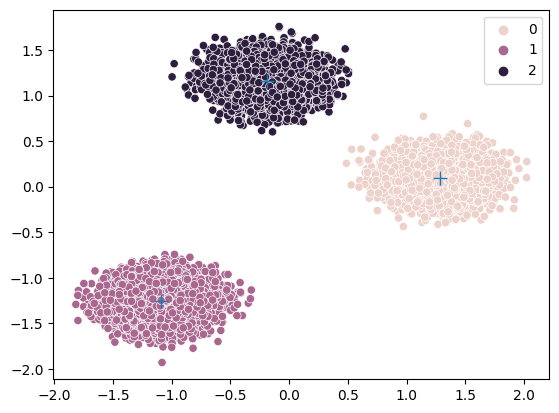

In [ ]:
sns.scatterplot(x=[x[0] for x in X_train],y=[x[1] for x in X_train],hue=new_labels)
plt.plot([x for x, _ in start.centroids],
         [y for _, y in start.centroids],
         '+',
         markersize=10,
         )
plt.show()

In [ ]:
start = KMeansplus(n_clusters=3,max_iter=3000,X_train=X_train)
start.fit()
new_labels = start.evaluate(X_train)

centroids initializing
centroids initialized
running iteration1


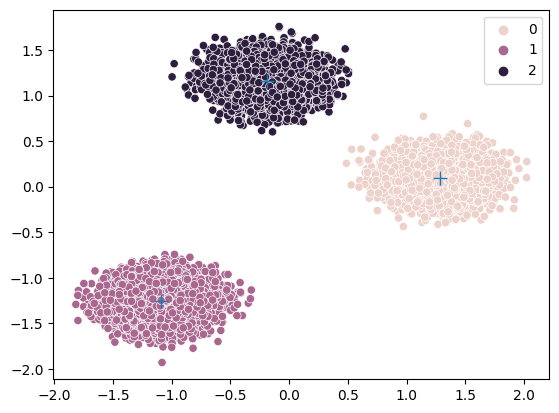

In [ ]:
sns.scatterplot(x=[x[0] for x in X_train],y=[x[1] for x in X_train],hue=new_labels)
plt.plot([x for x, _ in start.centroids],
         [y for _, y in start.centroids],
         '+',
         markersize=10,
         )
plt.show()

In [ ]:
def read_image(path):
  img = cv2.imread(path)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  img = img/255.0
  return img


In [ ]:
img = read_image("original.png")
plt.imshow(img)
# img = cv2.resize(img,(img.shape[0]//2,img.shape[1]//2))
print(img.shape)
image = img
rows = image.shape[0]
cols = image.shape[1]

image = image.reshape(rows*cols, 3)
start = KMeansplus(n_clusters=128,max_iter=10,X_train=image)
start.fit()

In [ ]:
print(start.centroids)

[array([0.98981884, 0.93334481, 0.7382188 ]), array([0.09146053, 0.821049  , 0.93840909]), array([0.12899461, 0.83483828, 0.91291417]), array([0.4533555 , 0.13051223, 0.06939012]), array([0.07255843, 0.81449561, 0.95111969]), array([0.02202744, 0.04266703, 0.22774316]), array([0.04804834, 0.0203662 , 0.02181398]), array([0.38644984, 0.66285993, 0.88172075]), array([0.75322653, 0.34275814, 0.38532061]), array([0.96028332, 0.99679537, 0.99933489]), array([0.9009767 , 0.89248735, 0.88279168]), array([0.00245098, 0.00492046, 0.01100629]), array([0.08575699, 0.47220127, 0.7183175 ]), array([0.01194296, 0.0030303 , 0.0030303 ]), array([0.91866667, 0.99478638, 0.99990093]), array([0.02883934, 0.7986394 , 0.9812306 ]), array([0.11583211, 0.829941  , 0.92183617]), array([0.99969611, 0.99491595, 0.90002653]), array([0.240682  , 0.87511901, 0.83806066]), array([0.00000000e+00, 0.00000000e+00, 1.38772144e-07]), array([0.9444235 , 0.94505195, 0.94668315]), array([0.20212639, 0.86142157, 0.86429901]

In [ ]:

def euclidian_distance(point,data):
  return np.sqrt(np.sum((point-data)**2,axis=1))
image1 = image
image2 = []
count = 0
for i in np.array(image1):
        # print(count)
        dist = euclidian_distance(i,start.centroids)
        centroid_idx = np.argmin(dist)
        image2.append(start.centroids[centroid_idx])
        count+=1

In [ ]:
print((rows,cols))

(1080, 1920)


In [ ]:
compressed_image = np.array(image2).reshape(rows, cols, 3)
# compressed_image = cv2.resize(compressed_image,(compressed_image.shape[0]*2,compressed_image.shape[1]*2))
compressed_image.shape

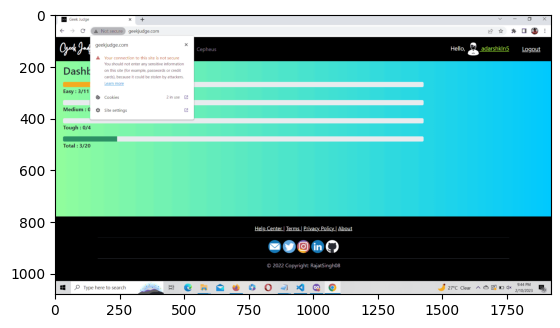

In [ ]:
plt.imshow(compressed_image)

In [ ]:
plt.imsave("compressed.png",compressed_image)

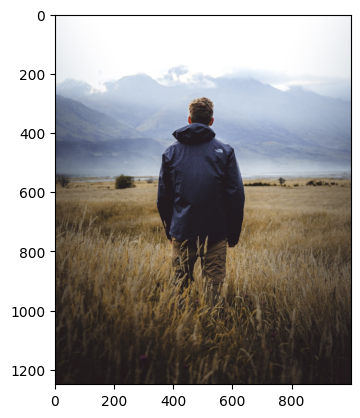

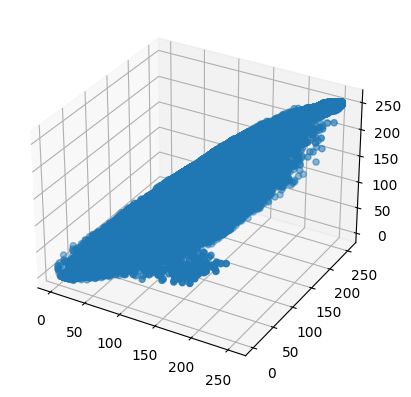

In [48]:
import matplotlib.pyplot as plt
img1 = cv2.imread("fincomp.jpg")
from mpl_toolkits.mplot3d import Axes3D
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
r,g,b = cv2.split(img1)
r = r.flatten()
g = g.flatten()
b = b.flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(r,g,b)
plt.show()

In [49]:
img1 = img1/255.0

vectorized = img1.reshape((-1,3))
vectorized = np.float32(vectorized)
kmeans = KMeansplus2(n_clusters=6,max_iter=100,X_train=vectorized,epsilon=1e-20)
kmeans.fit()
start = kmeans
image = vectorized
def euclidian_distance(point,data):
  return np.sqrt(np.sum((point-data)**2,axis=1))
image1 = image
image2 = []
count = 0
for i in np.array(image1):
        # print(count)
        dist = euclidian_distance(i,start.centroids)
        centroid_idx = np.argmin(dist)
        image2.append(start.centroids[centroid_idx])
        count+=1
# img2 = cv2.imread("original.png")
# rows = img2.shape[0]
# cols = img2.shape[1]
# segmented_image = np.array(image2).reshape(rows, cols, 3)
# plt.imshow(segmented_image)

centroids initializing
centroids initialized
running iteration1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[0.0137897525, 0.09502474, 0.03234041, 0.0, 0.04254353, 0.100083575]
running iteration2
[0.014853966, 0.032689255, 0.05508101, 0.0015952035, 0.015403326, 0.004653598]
running iteration3
[0.007854015, 0.0208419, 0.035835184, 0.004179317, 0.011621269, 0.005677934]
running iteration4
[0.004557606, 0.014180385, 0.05210277, 0.003987581, 0.022447336, 0.006722594]
running iteration5
[0.0031512133, 0.010492659, 0.055428747, 0.0055686994, 0.034092695, 0.0040848074]
running iteration6
[0.0021497302, 0.0068879267, 0.0428187, 0.0065761977, 0.030469075, 0.0031681866]
running iteration7
[0.0017330765, 0.0038828116, 0.025255648, 0.004344124, 0.022196528, 0.0051157353]
running iteration8
[0.0007385655, 0.0014574904, 0.013885079, 0.0021513954, 0.015246654, 0.004622562]
running iteration9
[0.00045693468, 0.00037541037, 0.0078619495, 0.0010182483, 0.010604156, 0.0045341346]
running iteration10
[5.1174633e-05, 0.0005515808, 0.0051868577, 0.00046568224, 0.0074724527, 0.003243452]
running iteration11
[4.899

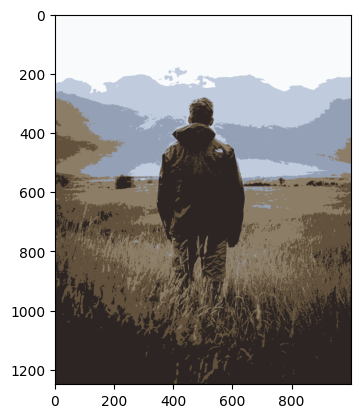

In [50]:
img2 = cv2.imread("fincomp.jpg")
rows = img2.shape[0]
cols = img2.shape[1]
segmented_image = np.array(image2).reshape(rows, cols, 3)
plt.imshow(segmented_image)

In [51]:
plt.imsave("segmentedfincomprgb6.jpg",segmented_image)
plt.imsave("segmentedfincomprgb6.png",segmented_image)

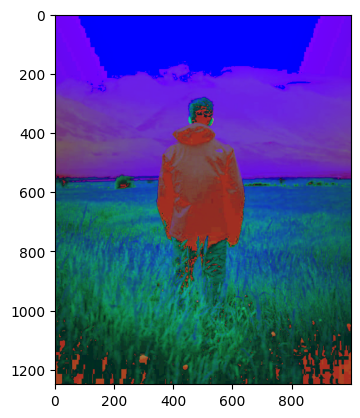

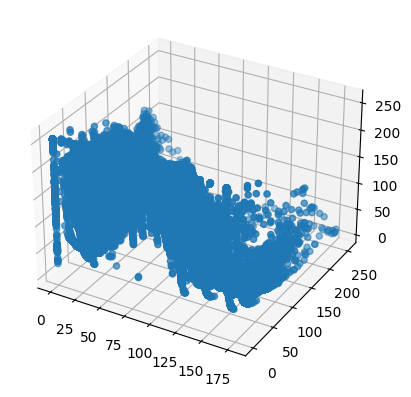

In [38]:
import matplotlib.pyplot as plt
img1 = cv2.imread("fincomp.jpg")
from mpl_toolkits.mplot3d import Axes3D
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2HSV)
plt.imshow(img1)
r,g,b = cv2.split(img1)
r = r.flatten()
g = g.flatten()
b = b.flatten()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax = Axes3D(fig)
ax.scatter(r,g,b)
plt.show()

In [39]:
img1 = img1/255.0

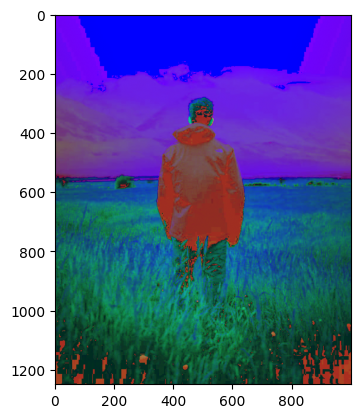

In [40]:
plt.imshow(img1)

In [41]:

vectorized = img1.reshape((-1,3))
vectorized = np.float32(vectorized)
kmeans = KMeansplus2(n_clusters=6,max_iter=100,X_train=vectorized)

In [42]:
kmeans.fit()

centroids initializing
centroids initialized
running iteration1
[0.117804825, 0.08794615, 0.09274208, 0.0011510378, 0.036277335, 0.07296331]


In [43]:
start = kmeans
image = vectorized
def euclidian_distance(point,data):
  return np.sqrt(np.sum((point-data)**2,axis=1))
image1 = image
image2 = []
count = 0
for i in np.array(image1):
        # print(count)
        dist = euclidian_distance(i,start.centroids)
        centroid_idx = np.argmin(dist)
        image2.append(start.centroids[centroid_idx])
        count+=1

In [44]:
img2 = cv2.imread("fincomp.jpg")
rows = img2.shape[0]
cols = img2.shape[1]

In [45]:
segmented_image = np.array(image2).reshape(rows, cols, 3)

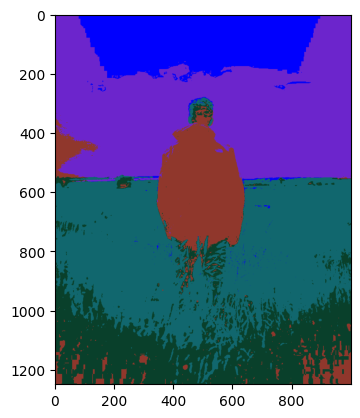

In [46]:
plt.imshow(segmented_image)

In [47]:
plt.imsave("segmentedfincomp4.png",segmented_image)